In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

The data used comes from Tokopedia (***not real data***). The dataset explanation is as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| Unique number for the order / order ID
customer_id 		|object|Unique number for the customer
order_date 		|object| Date when the transaction was made
sku_id 			|object| Unique number for the product (SKU stands for Stock Keeping Unit)
price			|int64| Price listed on the price
qty_ordered 		|int64| Quantity of items purchased by the customer
before_discount	|float64| Total product price before discount
(price * qty_ordered)
discount_amount	|float64| Total discount value for the product
after_discount		|float64| Total product price after discount is applied
is_gross 		|int64| Indicates that the customer has not paid for the order
is_valid		|int64| Indicates that the customer has made the payment
is_net			|int64| Indicates that the transaction is completed
payment_id 		|int64| Unique number for the payment method
||
**sku_detail:**
id |object| Unique number for the product (can be used as a key when joining tables)
sku_name 		|object| Name of the product
base_price		|float64| Price of the product as listed on the price tag
cogs 			|int64| Cost of Goods Sold (total cost to sell one product)
category		|object| Product category
||
**customer_detail:**
id 			|object| Unique number for the customer
registered_date	|object| Date when the customer registered as a member
||
**payment_detail:**
id			|int64| Unique number for the payment method
payment_method	|object| Payment method used


In [ ]:
# Data Source
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
# Display the first 5 rows
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
# Display the first 5 rows
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
# Display the first 5 rows
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
# Display the first 5 rows
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
# Running SQL in Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL to combine data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
# Display 5 first row
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
# Display data types for each column
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
# Change data type to make data processing easier and correct
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
# Change date column type to datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes

,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>

At the end of this year, the company will be giving prizes to customers who win the Year-End Festival competition. The Marketing Team needs assistance in determining the estimated prizes to be awarded to the competition winners. The prizes will be selected from the TOP 5 products in the Mobiles & Tablets category during 2022, based on the highest quantity of sales (valid = 1).

Please help by providing this data to the Marketing Team before the end of this month. We appreciate your assistance.

Regards,

**Marketing Team**

## `Answer 1`

In [ ]:
df1 = df[(df['category'] == 'Mobiles & Tablets') & (df['order_date'].dt.year == 2022) & (df['is_valid'] == 1)]
df1.filter = df1.groupby('sku_name')['qty_ordered'].sum().reset_index()
top_5 = df1.filter.sort_values(by='qty_ordered', ascending=False).head(5)
top_5

,sku_name,qty_ordered
1,IDROID_BALRX7-Gold,1000
2,IDROID_BALRX7-Jet black,31
3,Infinix Hot 4-Gold,15
43,samsung_Grand Prime Plus-Black,11
34,infinix_Zero 4-Grey,10


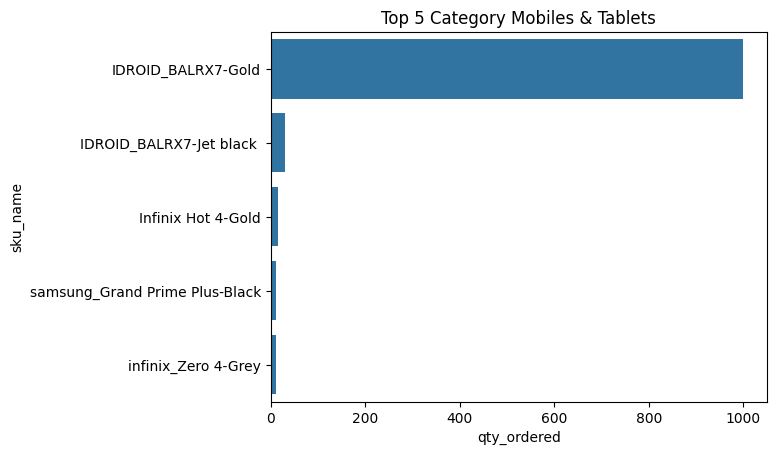

In [ ]:
sns.barplot(x ='qty_ordered', y = 'sku_name', data=top_5)
plt.title('Top 5 Category Mobiles & Tablets')
plt.show()

So, the Marketing Team will distribute prizes to the winners at the Year-End Festival. The team will give prizes to the top 5 best-selling products in the **Mobiles & Tablets** category. After filtering, the prizes to be awarded to the winners are:  

1. **IDROID_BALRX7-Gold**  
2. **Infinix Hot 4-Gold**  
3. **Samsung Grand Prime Plus-Black**  
4. **Infinix Zero 4-Grey**  

By distributing these **best-seller** prizes, the goal is not only to reward the winners but also to attract others to purchase these top-selling products—who knows, they might get lucky and win one for free! 🚀

## `Answer 2`
**Dear Data Analyst**,
<br></br>

Following the joint meeting between the Warehouse Team and the Marketing Team, we found that the stock availability of products in the Others category was still high at the end of 2022.

2.1 We request your assistance in checking the sales data for this category for the year 2021, based on the quantity sold. Our initial suspicion is that there was a decrease in sales quantity in 2022 compared to 2021. (Please also display data for all 15 categories).

2.2 If there was indeed a decrease in sales quantity in the Others category, we request your help in providing data on the TOP 20 products that experienced the highest decrease in 2022 compared to 2021. We will use this information for discussion in the next meeting.

Please send the data within 4 days from today. We appreciate your assistance.

Regards,

**Tim Werehouse**

## `Answer 2.1`




In [ ]:
# Filter by year
df2022 = df[(df['order_date'].dt.year == 2022) & (df['is_valid'] == 1)]
df2021 = df[(df['order_date'].dt.year == 2021) & (df['is_valid'] == 1)]

# Grouping by sku_name and count qty with sum
groupby_2022 = df2022.groupby('category')['qty_ordered'].sum()
groupby_2021 = df2021.groupby('category')['qty_ordered'].sum()

merge = pd.merge(groupby_2022, groupby_2021, how = 'outer', on = 'category', suffixes=('_2022', '_2021'))
merge.sort_values(by='category', ascending=True)

merge['difference'] = merge['qty_ordered_2022'] - merge['qty_ordered_2021']
merge['status'] = merge['difference'].apply(lambda x: 'decrease' if x < 0 else ('stagnant' if x == 0 else 'increase')) #jika x < 0 decrease, jika > 0 increase
merge_sort = merge.sort_values(by='difference', ascending=True)
merge_sort

,qty_ordered_2022,qty_ordered_2021,difference,status
category,,,,
Others,263,426,-163,decrease
Soghaat,612,759,-147,decrease
Men Fashion,175,237,-62,decrease
Beauty & Grooming,153,168,-15,decrease
Appliances,148,124,24,increase
Books,195,171,24,increase
Health & Sports,200,173,27,increase
Computing,153,109,44,increase
School & Education,237,184,53,increase


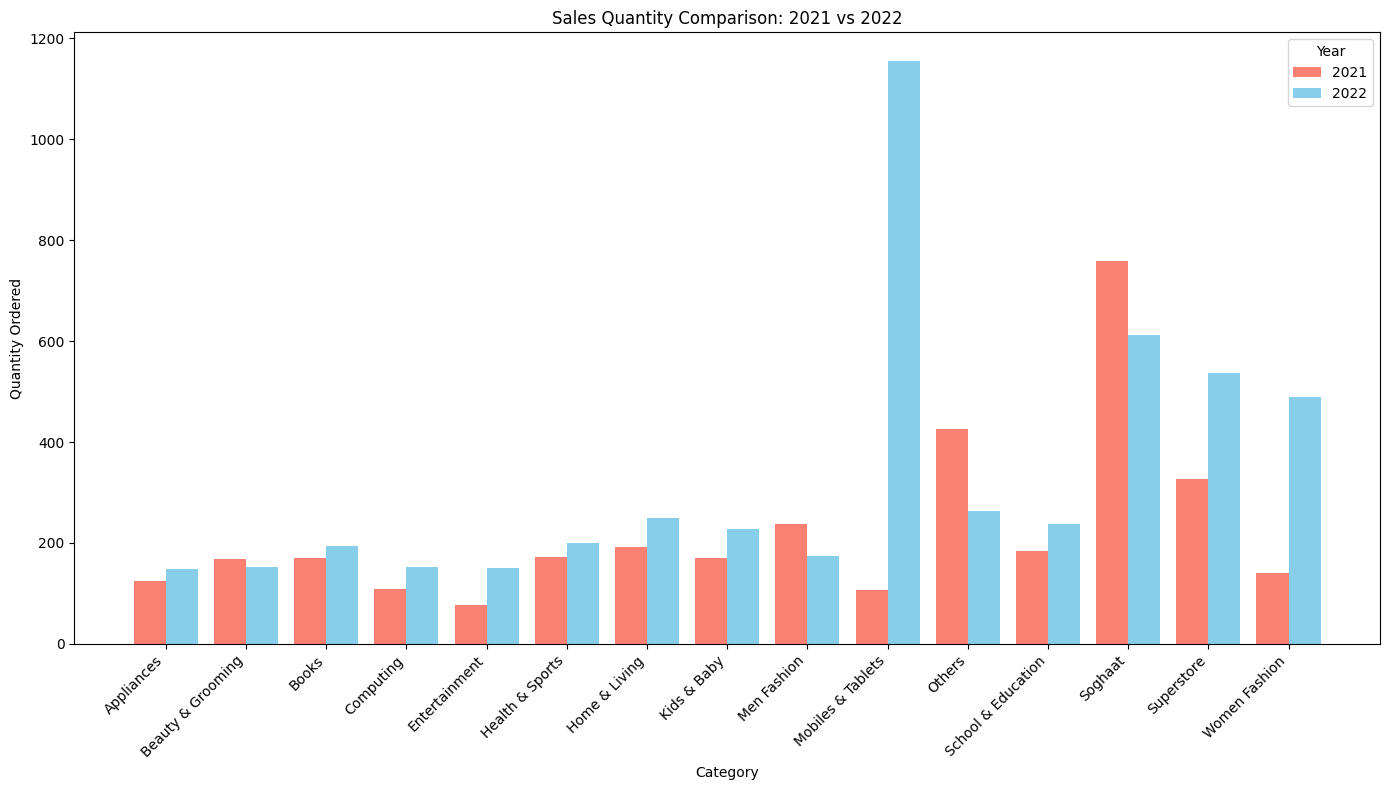

In [ ]:
categories = merge.index
qty_2022 = merge['qty_ordered_2022']
qty_2021 = merge['qty_ordered_2021']

# Bar width
bar_width = 0.4

# Positions of bars on x-axis
x = np.arange(len(categories))

# Create the plot
plt.figure(figsize=(14, 8))
plt.bar(x - bar_width/2, qty_2021, width=bar_width, label='2021', color='salmon')
plt.bar(x + bar_width/2, qty_2022, width=bar_width, label='2022', color='skyblue')

# Labeling
plt.xlabel('Category')
plt.ylabel('Quantity Ordered')
plt.title('Sales Quantity Comparison: 2021 vs 2022')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()

# Show the plot
plt.show()

## `Answer 2.2`




If there was indeed a decrease in sales quantity in the Others category, we request your help in providing data on the TOP 20 products that experienced the highest decrease in 2022 compared to 2021. We will use this information for discussion in the next meeting.

In [ ]:
df2022_others = df2022[df2022['category'] == 'Others']
df2021_others = df2021[df2021['category'] == 'Others']

groupby_2022_others = df2022_others.groupby('sku_name')['qty_ordered'].sum()
groupby_2021_others = df2021_others.groupby('sku_name')['qty_ordered'].sum()

merge2_2 = pd.merge(groupby_2022_others, groupby_2021_others, how = 'outer', on = 'sku_name', suffixes=('_2022', '_2021'))
merge2_2['difference'] = merge2_2['qty_ordered_2022'] - merge2_2['qty_ordered_2021']
merge2_2['status'] = merge2_2['difference'].apply(lambda x: 'decrease' if x < 0 else ('stagnant' if x == 0 else 'increase')) #jika x < 0 decrease, jika > 0 increase
top_20 = merge2_2.sort_values(by='difference', ascending=True).head(20)
top_20

,qty_ordered_2022,qty_ordered_2021,difference,status
sku_name,,,,
RB_Dettol Germ Busting Kit-bf,45.0,200.0,-155.0,decrease
Telemall_MM-DR-HB-L,2.0,23.0,-21.0,decrease
kansai_NeverWet,1.0,10.0,-9.0,decrease
emart_00-1,1.0,7.0,-6.0,decrease
MEGUIAR_G12711,1.0,4.0,-3.0,decrease
Aladdin_bike_cover,2.0,3.0,-1.0,decrease
aw_Ultra Shine Wash & Wax-64oz./1893ml,1.0,2.0,-1.0,decrease
Tmall_MM-DR-PAD,1.0,2.0,-1.0,decrease
Entertainer Asia_Vouch 365-2017 Mobile App Lahore,1.0,2.0,-1.0,decrease


In [ ]:
# Count the number of occurrences of each status in the 'status' column
status_counts = top_20['status'].value_counts()
status_counts

,count
status,
decrease,9
increase,8
stagnant,3


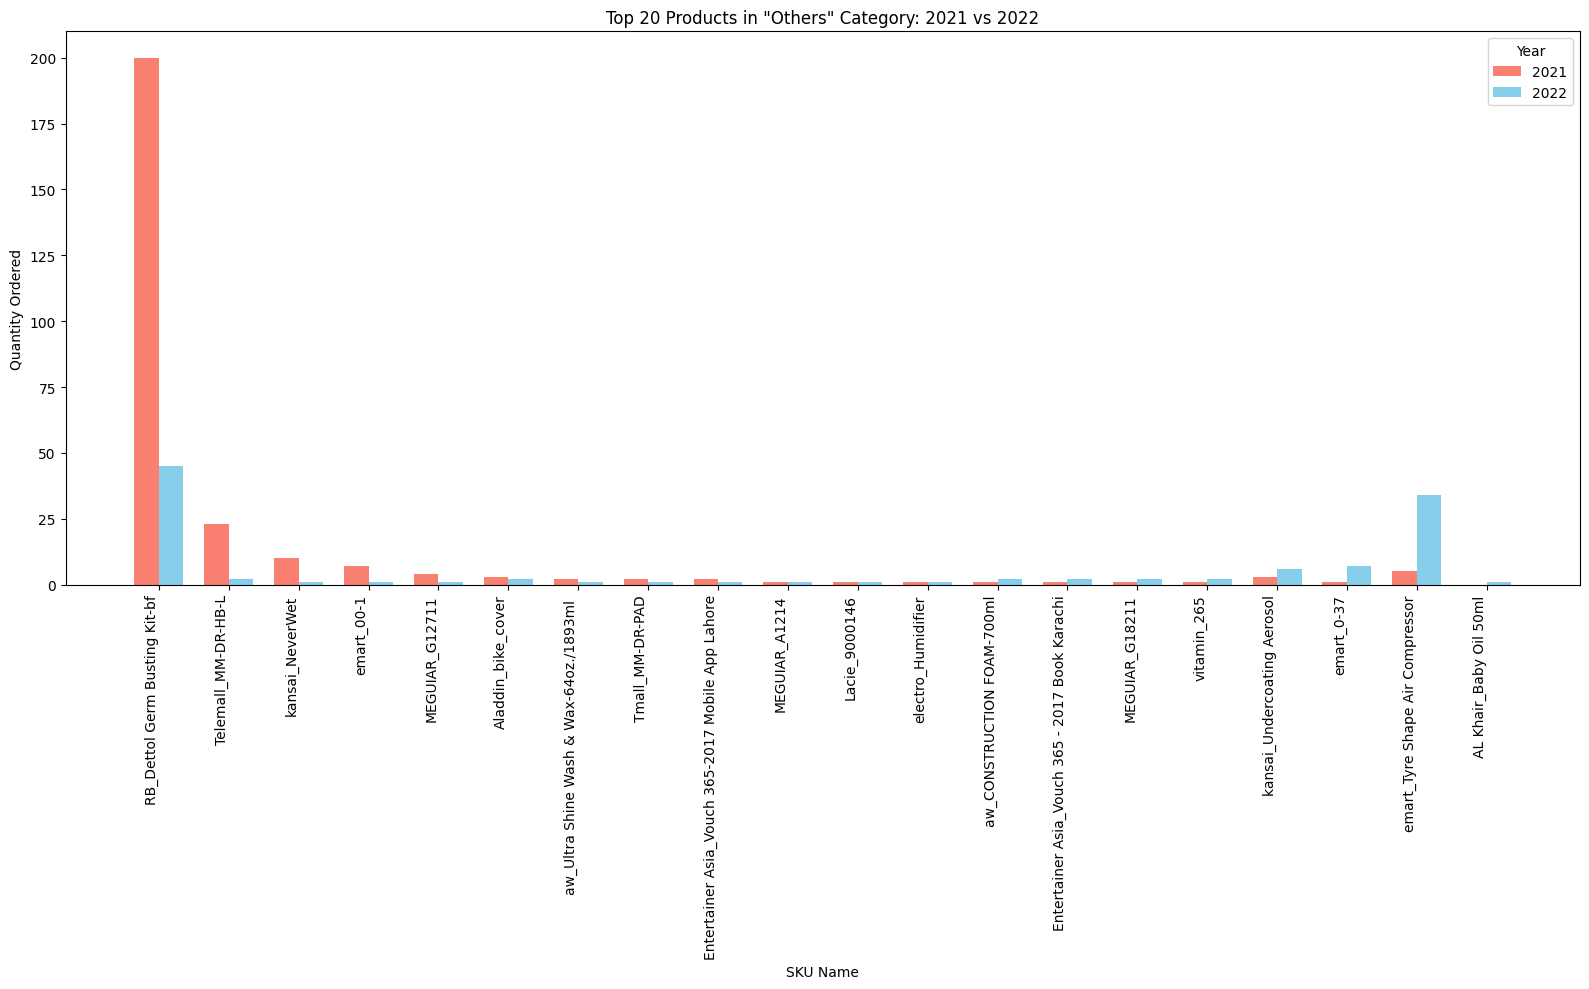

In [ ]:
# Prepare data for plotting
sku_names = top_20.index
qty_2022 = top_20['qty_ordered_2022']
qty_2021 = top_20['qty_ordered_2021']

# Bar width and positions
bar_width = 0.35
x = np.arange(len(sku_names))

# Create the plot
plt.figure(figsize=(16, 10))  # Increased figure size
plt.bar(x - bar_width/2, qty_2021, width=bar_width, label='2021', color='salmon')
plt.bar(x + bar_width/2, qty_2022, width=bar_width, label='2022', color='skyblue')

# Labeling
plt.xlabel('SKU Name')
plt.ylabel('Quantity Ordered')
plt.title('Top 20 Products in "Others" Category: 2021 vs 2022')
plt.xticks(x, sku_names, rotation=90, ha='right')
plt.legend(title='Year')
plt.tight_layout()

# Show the plot
plt.show()

## `Answer 3`
**Dear Data Analyst**,
<br></br>
Regarding the company's anniversary in the upcoming 2 months, the Digital Marketing Team will provide promotional information to customers at the end of this month. The criteria for the customers we need are those who have checked out but have not made a payment (is_gross = 1) during the year 2022. The data we need is Customer ID and Registered Date.
Please assist by sending this data to the Digital Marketing Team before the end of this month. We appreciate your help.

<br></br>
Regards

**Digital Marketing Team**

## `Answer No 3`

In [ ]:
# You can use more than one code block.
# **customer_detail**: id, registered_date, 1 -> true, 0 -> false
order = df[(df['is_gross'] == 1) & (df['order_date'].dt.year == 2022) & (df['is_valid'] == 0) & (df['is_net'] == 0)] #isgross-> checkout, isvalid-> dh bayar, isnet -> transaksi selesai
hasil3 = order[['customer_id', 'registered_date']].drop_duplicates() #drop_duplicates to make unique

In [ ]:
#J Run code to donwload files
from google.colab import files
df.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data = pd.read_csv('/content/audience_list.csv')
data

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,1,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-23
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,1,1,1,cod,Bahr-e-Shifa,0,0,Books,2022-05-19
5881,ODR7628482404c,C265450L,2022-10-07,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-02-17
5882,ODR2809405363p,C790722L,2022-11-07,P194155,0,2,0,0,0,1,1,1,1,cod,Bahr-e-Shifa,0,0,Books,2021-11-19


## `Answer 4`
**Dear Data Analyst**,
<br></br>
From October to December 2022, we conducted campaigns every Saturday and Sunday. We would like to assess whether these campaigns had a significant impact on sales (before_discount). Please help us by providing the following data:

4. 1 The average daily sales on weekends (Saturday and Sunday) vs. the average daily sales on weekdays (Monday-Friday) for each of those months. Is there an increase in sales in each of those months?
4.2 The average daily sales on weekends (Saturday and Sunday) vs. the average daily sales on weekdays (Monday-Friday) for the entire 3-month period.

Please send the data by next week at the latest. We appreciate your assistance in this matter.

Regards,

**Campaign Team**


## `Answer 4.1`

In [ ]:
# Break down by day, month_name, and month
data['order_date'] = pd.to_datetime(data['order_date'])
data['day'] = data['order_date'].dt.day_name()
data['month_name'] = data['order_date'].dt.month_name()
data['month'] = data['order_date'].dt.month
data

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,day,month_name,month
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,Friday,November,11
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,Friday,November,11
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,Thursday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,Sunday,November,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-23,Friday,July,7
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-05-19,Tuesday,September,9
5881,ODR7628482404c,C265450L,2022-10-07,P194155,0,3,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-02-17,Friday,October,10
5882,ODR2809405363p,C790722L,2022-11-07,P194155,0,2,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2021-11-19,Monday,November,11


In [ ]:
valid = data[data['is_valid'] == 1]
valid

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,day,month_name,month
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,Friday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,Sunday,November,11
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,...,1,cod,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19,Thursday,December,12
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,...,3,customercredit,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13,Thursday,December,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,ODR6864259419h,C714630L,2022-07-25,P194155,0,3,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-06-24,Monday,July,7
5878,ODR8376183747r,C300950L,2022-07-28,P194155,0,1,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2021-09-05,Thursday,July,7
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-23,Friday,July,7
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-05-19,Tuesday,September,9


In [ ]:
# Filter data by day including 'Saturday', 'Sunday' using isin function and store in variable 'weekends'
weekends = valid[valid['day'].isin(['Saturday', 'Sunday'])]
weekends

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,day,month_name,month
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,Sunday,November,11
11,ODR2741972772y,C483469L,2021-11-21,P239399,3683000,1,3683000,552450,3130550,1,...,2,jazzvoucher,Honda_BikeCD70-Black,3683000,3130550,Superstore,2021-07-26,Sunday,November,11
16,ODR8451284001a,C805381L,2022-05-22,P726605,3278450,1,3278450,406000,2872450,1,...,4,Payaxis,Ifitness_JW901,3335000,2901450,Health & Sports,2022-04-13,Sunday,May,5
20,ODR2268957100j,C813380L,2022-04-16,P619324,5626000,1,5626000,348000,5278000,1,...,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-05,Saturday,April,4
34,ODR3138948564v,C609754L,2022-11-06,P622378,1195902,1,1195902,174000,1021902,1,...,4,Payaxis,AYS_32-32G6530,1195902,1076306,Entertainment,2022-06-22,Sunday,November,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,ODR7582243074d,C678199L,2022-02-06,P194155,0,1,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-06-02,Sunday,February,2
5862,ODR9489319211b,C533080L,2022-03-06,P194155,0,1,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-06-09,Sunday,March,3
5864,ODR4537217779s,C186133L,2022-05-15,P194155,0,1,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-05-19,Sunday,May,5
5869,ODR7665493064i,C647975L,2022-05-28,P194155,0,2,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-05-12,Saturday,May,5


In [ ]:
# Filter data by day including 'Monday','Tuesday','Wednesday','Thusday','Friday' using isin function and save with variable 'weekday'
weekday = valid[valid['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekday

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,day,month_name,month
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,Friday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,Monday,November,11
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,...,1,cod,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19,Thursday,December,12
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,...,3,customercredit,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13,Thursday,December,12
12,ODR5064165483d,C329053L,2021-11-23,P239399,3683000,1,3683000,552450,3130550,1,...,2,jazzvoucher,Honda_BikeCD70-Black,3683000,3130550,Superstore,2021-09-20,Tuesday,November,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,ODR6864259419h,C714630L,2022-07-25,P194155,0,3,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-06-24,Monday,July,7
5878,ODR8376183747r,C300950L,2022-07-28,P194155,0,1,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2021-09-05,Thursday,July,7
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-23,Friday,July,7
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,...,1,cod,Bahr-e-Shifa,0,0,Books,2022-05-19,Tuesday,September,9


In [ ]:
# Filtering data on transactions during October to December 2022
filter_weekends = weekends[(weekends['order_date'].dt.year==2022) & (weekends['month'].isin([10,11,12]))]
filter_weekday = weekday[(weekday['order_date'].dt.year==2022) & (weekday['month'].isin([10,11,12]))]

In [ ]:
# Use groupby based on each variable
groupby_weekends = filter_weekends.groupby('month_name')['before_discount'].sum() / filter_weekends['order_date'].nunique()
groupby_weekday = filter_weekday.groupby('month_name')['before_discount'].sum()/ filter_weekday['order_date'].nunique()

In [ ]:
# Combine both data with merge
merge_4_1 = pd.merge(groupby_weekends, groupby_weekday, on='month_name', how='outer', suffixes=('_weekends', '_weekday'))
merge_4_1 = merge_4_1.reset_index()
merge_4_1_sort = merge_4_1.sort_values(by='month_name', ascending=False)
merge_4_1_sort

,month_name,before_discount_weekends,before_discount_weekday
2,October,2.446432e+06,2.315357e+06
1,November,1.649727e+06,2.189882e+06
0,December,1.173141e+06,3.015011e+06


In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'])
data['day'] = data['order_date'].dt.day_name()
data['month_name'] = data['order_date'].dt.month_name()
data['month'] = data['order_date'].dt.month
valid = data[data['is_valid'] == 1]
weekends = valid[valid['day'].isin(['Saturday', 'Sunday'])]
weekday = valid[valid['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
filter_weekends = weekends[(weekends['order_date'].dt.year==2022) & (weekends['month'].isin([10,11,12]))]
filter_weekday = weekday[(weekday['order_date'].dt.year==2022) & (weekday['month'].isin([10,11,12]))]
groupby_weekends = filter_weekends.groupby('month_name')['before_discount'].sum() / filter_weekends['order_date'].nunique()
groupby_weekday = filter_weekday.groupby('month_name')['before_discount'].sum()/ filter_weekday['order_date'].nunique()
merge_4_1 = pd.merge(groupby_weekends, groupby_weekday, on='month_name', how='outer', suffixes=('_weekends', '_weekday'))
merge_4_1 = merge_4_1.reset_index()
merge_4_1_sort = merge_4_1.sort_values(by='month_name', ascending=False)
merge_4_1_sort

,month_name,before_discount_weekends,before_discount_weekday
2,October,2.446432e+06,2.315357e+06
1,November,1.649727e+06,2.189882e+06
0,December,1.173141e+06,3.015011e+06


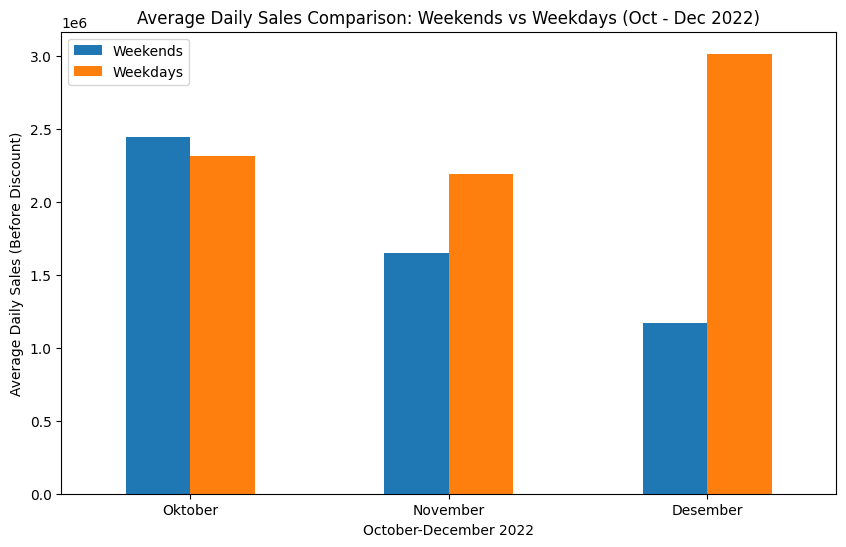

In [ ]:
# Display on a bar graph to see the difference.
merge_4_1_sort.plot(kind='bar', figsize=(10, 6))
plt.title('Average Daily Sales Comparison: Weekends vs Weekdays (Oct - Dec 2022)') #untuk judul paling atas
plt.xlabel('October-December 2022') #sumbu x
plt.ylabel('Average Daily Sales (Before Discount)') #sumbu
plt.xticks(ticks=[0, 1, 2], labels=['Oktober', 'November', 'Desember'], rotation=0) #ticks 0,1,2 menunjukkan bahwa bakal ada 3 batang
#labels=oktober november desember untuk menamai setiap ticks, rotation=0 agar sumbu x tidak diputar
plt.legend(['Weekends', 'Weekdays']) #untuk membedakan warnanya setiap untuk weekends dan weekdays
plt.show()

Average daily sales of weekends (Saturday and Sunday) vs. average daily sales of weekdays (Monday-Friday) per month. Is there an increase in sales in each of these months?

There was an increase in sales in October 2022 where the average daily sales from weekdays to weekends experienced the highest increase. While the decrease in average daily sales occurred in December 2022.

## `Answer 4.2`

Average daily sales for weekends (Saturday and Sunday) vs. average daily sales for weekdays (Monday-Friday) for the entire 3 months.

In [ ]:
# Calculate the average daily sales for weekends over the past three months.
total_sales_weekends_all = filter_weekends['before_discount'].sum()
unique_days_weekends_all = filter_weekends['order_date'].nunique()
average_sales_weekends_all = total_sales_weekends_all / unique_days_weekends_all

# Calculate the average daily sales for weekdays over the past three months.
total_sales_weekday_all = filter_weekday['before_discount'].sum()
unique_days_weekday_all = filter_weekday['order_date'].nunique()
average_sales_weekday_all = total_sales_weekday_all / unique_days_weekday_all

data = {
    'Category': ['Weekends', 'Weekdays'],
    'Average Sales': [average_sales_weekends_all, average_sales_weekday_all]
}

df_sales = pd.DataFrame(data)

df_sales

,Category,Average Sales
0,Weekends,5.269300e+06
1,Weekdays,7.520249e+06


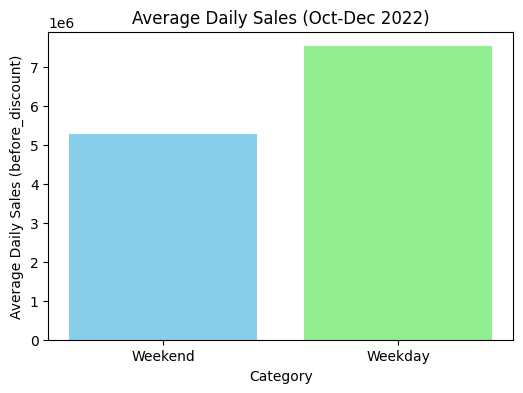

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Weekend', 'Weekday'], [average_sales_weekends_all, average_sales_weekday_all], color=['skyblue', 'lightgreen'])
plt.title('Average Daily Sales (Oct-Dec 2022)')
plt.xlabel('Category')
plt.ylabel('Average Daily Sales (before_discount)')
plt.show()